#  Análisis exploratorio de datos
## Procesos de contratación pública en la plataforma SECOP II - Contratos Electrónicos activos

Datos alojados en la plataforma de datos abiertos Colombia:
https://www.datos.gov.co/Gastos-Gubernamentales/SECOP-II-Contratos-Electr-nicos-ACTIVOS/p8vk-huva
(Fecha de Actualización:02/11/2023)

### Interrogantes a resolver:

1- Origen de recursos para contratación pública que represente mayor aporte a los procesos de contratación por año.

2- Distribución de los recursos distribuidos por orden (Corporación Autónoma / Nacional / Territorial) y Top 5 Departamentos con mayor asignación.

3- Tipo de contración (Directa, Decreto, ...) con el que se gestiona la mayor cantidad de recursos, número de contratos y valor de los mismos. 

4- Top 5 sectores (Medio ambiente, Deporte, transporte,...) que reciben mayor cantidad de recursos para contratación para funcionamiento.

5- Número y valor de contratos gestionados por la rama judicial en el departamento de Santander.

6- Asignación de recursos distribuidos para contratación pública en el sector defensa por año.

7- Sectores con mayor asignación de recursos distribuidos en lo corrido del 2023.

8- Entidades territoriales/ Departamentos que realiza mayor aporte de recursos propios para procesos de contratación pública.

9- Meses con mayor gestion de contratos, Número y valor de los mismos. Indique Top 3 Departamentos que durante estos meses en 2022 gestionaron estos recursos.

10- Relación Valor y número de contratos por tipo de proveedor.

11- Comparativa gestión de contratos en Santander a partir de recursos propios y distribuidos por año.

In [3]:
### Importando archivo .csv y librerias

import pandas as pd
df = pd.read_csv('SECOP_II_-_Contratos_ACTIVOS_20231102.csv')

from datetime import date, datetime
import matplotlib.pyplot as plt

In [4]:
df.columns

Index(['Nombre Entidad', 'Nit Entidad', 'Departamento', 'Ciudad',
       'Localización', 'Orden', 'Sector', 'Rama', 'Entidad Centralizada',
       'Proceso de Compra', 'ID Contrato', 'Referencia del Contrato',
       'Estado Contrato', 'Codigo de Categoria Principal',
       'Descripcion del Proceso', 'Tipo de Contrato',
       'Modalidad de Contratacion', 'Justificacion Modalidad de Contratacion',
       'Fecha de Firma', 'Fecha de Inicio del Contrato',
       'Fecha de Fin del Contrato', 'Fecha de Inicio de Ejecucion',
       'Fecha de Fin de Ejecucion', 'Condiciones de Entrega',
       'TipoDocProveedor', 'Documento Proveedor', 'Proveedor Adjudicado',
       'Es Grupo', 'Es Pyme', 'Habilita Pago Adelantado', 'Liquidación',
       'Obligación Ambiental', 'Obligaciones Postconsumo', 'Reversion',
       'Valor del Contrato', 'Valor de pago adelantado', 'Valor Facturado',
       'Valor Pendiente de Pago', 'Valor Pagado', 'Valor Amortizado',
       'Valor Pendiente de Amortizacion', 'Val

In [5]:
#Selección de variables
df =df.loc[:, ['Nombre Entidad', 'Departamento', 'Ciudad',
       'Localización', 'Orden', 'Sector', 'Rama', 'ID Contrato', 'Tipo de Contrato',
       'Modalidad de Contratacion','Fecha de Firma', 'Fecha de Inicio del Contrato',
       'Fecha de Fin del Contrato', 'TipoDocProveedor', 'Documento Proveedor', 
       'Valor del Contrato', 'Destino Gasto','Origen de los Recursos']]

In [6]:
df.head(1)

,Nombre Entidad,Departamento,Ciudad,Localización,Orden,Sector,Rama,ID Contrato,Tipo de Contrato,Modalidad de Contratacion,Fecha de Firma,Fecha de Inicio del Contrato,Fecha de Fin del Contrato,TipoDocProveedor,Documento Proveedor,Valor del Contrato,Destino Gasto,Origen de los Recursos
0,Secretaría Distrital de Integración Social,Distrito Capital de Bogotá,No Definido,"Colombia, Bogotá, Bogotá",Territorial,Inclusión Social y Reconciliación,Ejecutivo,CO1.PCCNTR.859877,Prestación de servicios,Contratación directa,03/08/2019,02/27/2019,12/26/2019,Cédula de Ciudadanía,1013609393,37050000,Inversión,Distribuido


In [7]:
#Split columna ID_Contrato
df[['cod1','cod2','ID_Contrato']] = df['ID Contrato'].str.split(pat ='.',n=2, expand =True)
#Eliminación columnas cod1, cod1, ID Contrato
df.drop(columns =['cod1', 'cod2','ID Contrato'], inplace = True)
#Set_index ID_Contrato
df.set_index('ID_Contrato').sort_values(by= 'Fecha de Firma', ascending = True).head(1)

,Nombre Entidad,Departamento,Ciudad,Localización,Orden,Sector,Rama,Tipo de Contrato,Modalidad de Contratacion,Fecha de Firma,Fecha de Inicio del Contrato,Fecha de Fin del Contrato,TipoDocProveedor,Documento Proveedor,Valor del Contrato,Destino Gasto,Origen de los Recursos
ID_Contrato,,,,,,,,,,,,,,,,,
268123,MINISTERIO DEL DEPORTE,Distrito Capital de Bogotá,Bogotá,"Colombia, Bogotá, Bogotá",Nacional,deportes,Ejecutivo,Otro,Contratación régimen especial,01/01/2018,12/29/2017,06/30/2018,No Definido,860047439,900000000,Inversión,Distribuido


In [8]:
df.info()
#cambio de formato 'Fecha de Firma'
df['Fecha de Firma'] = pd.to_datetime(df['Fecha de Firma'])
df['Fecha de Fin del Contrato'] = pd.to_datetime(df['Fecha de Fin del Contrato'])
#Relleno de celdas vacias (31) con fecha anterior 
df["Fecha de Firma"].fillna( method ='ffill', inplace = True)
#Creación de columna 'Año'
df["Año"] = df["Fecha de Firma"].dt.year
df["Mes"] = df['Fecha de Firma'].dt.month
#Renombre columna 'Origen de Recursos'
df = df.rename(columns ={'Origen de los Recursos' :'Origen_Recursos','Fecha de Fin del Contrato':'Fecha_Fin_Contrato'})

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215151 entries, 0 to 215150
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   Nombre Entidad                215151 non-null  object
 1   Departamento                  215151 non-null  object
 2   Ciudad                        215151 non-null  object
 3   Localización                  215151 non-null  object
 4   Orden                         215151 non-null  object
 5   Sector                        215151 non-null  object
 6   Rama                          215151 non-null  object
 7   Tipo de Contrato              215151 non-null  object
 8   Modalidad de Contratacion     215151 non-null  object
 9   Fecha de Firma                215120 non-null  object
 10  Fecha de Inicio del Contrato  169556 non-null  object
 11  Fecha de Fin del Contrato     215137 non-null  object
 12  TipoDocProveedor              215151 non-null  object
 13 

In [9]:
df.isnull().sum()

Nombre Entidad                      0
Departamento                        0
Ciudad                              0
Localización                        0
Orden                               0
Sector                              0
Rama                                0
Tipo de Contrato                    0
Modalidad de Contratacion           0
Fecha de Firma                      0
Fecha de Inicio del Contrato    45595
Fecha_Fin_Contrato                 14
TipoDocProveedor                    0
Documento Proveedor                 2
Valor del Contrato                  0
Destino Gasto                       0
Origen_Recursos                     0
ID_Contrato                         0
Año                                 0
Mes                                 0
dtype: int64

### Análisis exploratorio de datos

1- Origen de recursos para contratación pública que represente mayor aporte a los procesos de contratación general y por año.

In [10]:
#Porcentaje origen de recursos general
round(df.groupby('Origen_Recursos')['Valor del Contrato'].sum()/df['Valor del Contrato'].sum()*100,2)

Origen_Recursos
Distribuido         87.21
Recursos Propios    12.79
Name: Valor del Contrato, dtype: float64

In [11]:
#Porcentaje de recursos por año
round(df.groupby(['Año','Origen_Recursos'])['Valor del Contrato'].sum().unstack()/df['Valor del Contrato'].sum()*100,3)

Origen_Recursos,Distribuido,Recursos Propios
Año,,
2015,0.003,NaN
2016,0.259,NaN
2017,5.151,NaN
2018,19.180,0.000
2019,16.556,0.000
2020,13.199,0.952
2021,5.200,1.714
2022,5.549,1.019
2023,22.117,9.101


El 87.21% de los recursos empleados para contratación pública entre 2015 y 2023 corresponden a recursos de origen distribuido, es decir provenientes del presupuesto general de la nación, sistema general de regalias, sistema general de participación etc., el 12.79% restante corresponde a recursos propios de las entidades. Entre 2015 y 2019 la totalidad de los recursos para contratación fue de origen distribuido y desde 2020 hasta la fecha, se hacen presente las dos modalidades de financiación. En todos los casos, los recursos de origen distribuido realizan el mayor aporte de recursos en los procesos de contratación.


2- Distribución de los recursos distribuidos por orden (Corporación Autónoma / Nacional / Territorial) y Top 5 Departamentos con mayor asignación.

In [12]:
#Dsitribución de recursos
round(df[df['Origen_Recursos'] == "Distribuido"].groupby(['Orden','Origen_Recursos'])['Valor del Contrato'].sum()/df['Valor del Contrato'].sum()*100,2).unstack()

Origen_Recursos,Distribuido
Orden,
Corporación Autónoma,0.26
Nacional,44.48
Territorial,42.48


In [13]:
df['Origen_Recursos'].value_counts(normalize = True)

Origen_Recursos
Distribuido         0.943695
Recursos Propios    0.056305
Name: proportion, dtype: float64

In [14]:
#Top 5 dptos mayor asignación
(round(df[df["Origen_Recursos"] == "Distribuido"].groupby('Departamento')['Valor del Contrato'].sum().sort_values(ascending = False).head()/ df['Valor del Contrato'].sum()*100,2))

Departamento
Distrito Capital de Bogotá    48.94
Antioquia                      6.76
Cundinamarca                   4.14
Valle del Cauca                3.02
Bolívar                        2.92
Name: Valor del Contrato, dtype: float64

<Axes: title={'center': 'Top 5 Departamentos con mayor asignación de recursos'}, xlabel='% Recursos', ylabel='Departamento'>

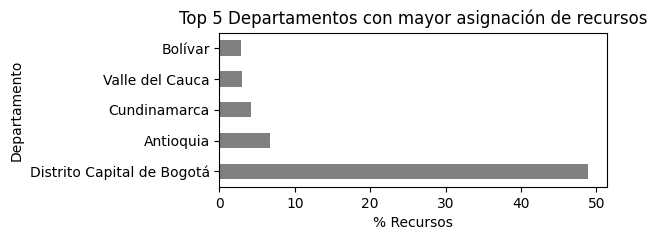

In [15]:
#Top 5 dptos mayor asignación
(round(df[df["Origen_Recursos"] == "Distribuido"].groupby('Departamento')['Valor del Contrato'].sum().sort_values(ascending = False).head()/ df['Valor del Contrato'].sum()*100,2)).plot(kind='barh', figsize =(5,2), color = 'grey', xlabel = '% Recursos', title ='Top 5 Departamentos con mayor asignación de recursos')

Entre 2015 y lo corrido de 2023, el 44.48% los recursos de origen distribuido ha sido destinado a la contración pública de orden nacional, el 42.48% al orden territorial y el 0.26% restante fue asignado a corporaciones autónomas. En lo que respecta a la distribución de estos recursos a nivel departamental , el distrito capital de Bogotá, de regimen especial, recibió el 48,94% de los recursos de la Nación, seguido de Antioquia, Cundinamarca, Valle del Cauca y Bolívar con el 6.76,4.14,3.02 y 2.92% respectivamente.

3- Modalidad de contración (Directa, Decreto, ...) con el que se gestiona la mayor cantidad de recursos, número de contratos y valor de los mismos. 

In [16]:
# Recursos asignados y número de contratos según Modalidad de contratación
df.groupby('Modalidad de Contratacion')['Valor del Contrato'].agg(['count','sum']).sort_values(by='sum', ascending = False).head()

,count,sum
Modalidad de Contratacion,,
Contratación directa,150661,9992728400698
Licitación pública Obra Publica,523,2762509882996
Contratación régimen especial,19411,2573083806565
Licitación pública,689,2130015180081
Contratación régimen especial (con ofertas),2444,2071924873954


In [17]:
# % Recursos asignados según Modalidad de contratación
round(df.groupby('Modalidad de Contratacion')['Valor del Contrato'].sum().sort_values(ascending = False).head(3)/df['Valor del Contrato'].sum()*100,2)

Modalidad de Contratacion
Contratación directa               40.99
Licitación pública Obra Publica    11.33
Contratación régimen especial      10.55
Name: Valor del Contrato, dtype: float64

Modalidad de Contratacion
Contratación directa             70.03
Mínima cuantía                   11.14
Contratación régimen especial     9.02
Name: Valor del Contrato, dtype: float64

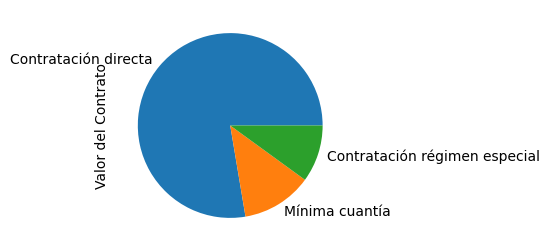

In [18]:
# Contratos celebrados según Modalidad de contratación  
display(round(df.groupby('Modalidad de Contratacion')['Valor del Contrato'].count().sort_values(ascending = False).head(3)/df['Valor del Contrato'].count()*100,2))

(round(df.groupby('Modalidad de Contratacion')['Valor del Contrato'].count().sort_values(ascending = False).head(3)/df['Valor del Contrato'].count()*100,2)).plot(kind='pie', figsize=(5,3))
plt.show()


En términos de recursos, la modalidad de contratación con la que se gestiona mayor cantidad de contratos, es la contratación directa con el 40.99% de los recursos, modalidad que a su vez representa el 70% (150661) de los contratos celebrados.

4- Top 5 sectores (Medio ambiente, Deporte, transporte,...) que reciben mayor cantidad de recursos para contratación para funcionamiento.

In [19]:
# Asignación de recursos distribuidos por sector y destino del gasto
df[df['Origen_Recursos'] == "Distribuido"].groupby(['Sector','Destino Gasto'])['Valor del Contrato'].sum().unstack().sort_values(by="Funcionamiento", ascending = False).head()

Destino Gasto,Funcionamiento,Inversión,No Definido
Sector,,,
defensa,1741055426393,270113539172,119842107942
Servicio Público,1206564790761,3673985606462,115666957909
Minas y Energía,656666198140,215854296278,70556521155
Ley de Justicia,639850062273,176344914625,4549876687
Hacienda y Crédito Público,531279851866,103581142000,14329832964


En su orden, Defensa, servicio público, minas y energía, ley de justicia y hacienda y crédito público son los 5 sectores que reciben mayor cantidad de recursos distribuidos para funcionamiento.

5- Número y valor de contratos gestionados por la rama judicial en el departamento de Santander.

In [20]:
df[df['Departamento'] == "Santander"].groupby('Rama')['Valor del Contrato'].agg(['count', 'sum'])

,count,sum
Rama,,
Corporación Autónoma,572,21300334880
Ejecutivo,6904,307365243473
Judicial,78,2596335026
Legislativo,1,9063911


Entre 2015 y lo corrido de 2023, la rama judicial en santander ha gestionado 78 contratos por valor de $2.596.335.026.

6- Comparativa asignación de recursos distribuidos para contratación pública en el sector defensa por año.

Año
2016      2037089517
2017    138820418474
2018    669206019719
2019    609379102202
2020    212842940154
2021     83577425775
2022     14723707299
2023    400424370367
Name: Valor del Contrato, dtype: int64

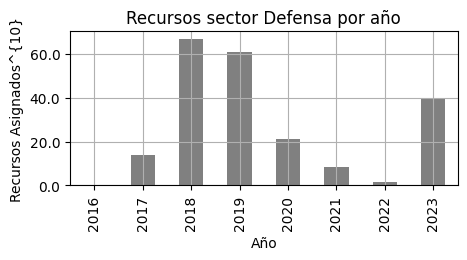

In [21]:
from matplotlib.ticker import FuncFormatter
display(df.query(" Origen_Recursos == 'Distribuido' & Sector ==  'defensa' ").groupby('Año')['Valor del Contrato'].sum())
df.query(" Origen_Recursos == 'Distribuido' & Sector ==  'defensa' ").groupby('Año')['Valor del Contrato'].sum().plot(kind ='bar', figsize =(5,2), color = 'grey' , ylabel = 'Recursos Asignados^{10}' , title = 'Recursos sector Defensa por año', grid = True)
formatter = FuncFormatter(lambda y, _: str(y / 10000000000))
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()

El mayor aporte de recursos distribuidos para la contratación pública  en el sector Defensa se realizó durante los años 2018 y 2019, año en el que la inversión se desescaló paulatinamenta hasta 2022 donde se registra el valor mínimo de $$ 14.723.707.299. En lo corrido de 2023 se han asignado $400.311.070.367 .

7- Sectores del orden Nacional y orden Territorial con mayor asignación de recursos distribuidos en 2022.

In [22]:
#Orden Nacional
df.query("Año == 2022 & Orden == 'Nacional' ").groupby('Sector')['Valor del Contrato'].sum().sort_values(ascending = False).head(3)

Sector
Transporte          29144099241
interior            22659316737
Servicio Público    21488318688
Name: Valor del Contrato, dtype: int64

In [23]:
#Orden Territorial
df.query("Año == 2022 & Orden == 'Territorial'").groupby('Sector')['Valor del Contrato'].sum().sort_values(ascending = False).head(3)

Sector
Servicio Público              677569244949
Hacienda y Crédito Público    240533910094
No aplica/No pertenece        233470778526
Name: Valor del Contrato, dtype: int64

En 2022, del orden Nacional, los sectores con mayor asignación de recursos distribuidos para contratación pública son en su orden: Transporte,Interiror y Servicio Público. Por su parte para el orden Territorial,el Servicio Público y Hacienda y Crédito público recibieron la mayor cantidad de aportes. El sector del orden territorial que ocupa el tercer lugar en asignaciones no esta definido especificamente.

8- Top 5 Entidades territoriales/ Departamentos que realiza mayor aporte de recursos propios para procesos de contratación pública.

In [24]:
df[df['Origen_Recursos'] == 'Recursos Propios'].groupby('Departamento')['Valor del Contrato'].agg(['sum', 'count']).sort_values(by ='sum', ascending= False).head()

,sum,count
Departamento,,
Distrito Capital de Bogotá,1177339324946,5224
La Guajira,488914368207,128
Cundinamarca,316267850654,394
Atlántico,259947424206,713
Antioquia,176038676673,1089


Las entidades territoriales o departamentos que hacen mayor contribución de recursos propios en los procesos de contratación pública, son es su orden: Distrito especial de Bogotá, La Guajira, Cundinamarca, Atlántico y Antioquia. Caso particular se presenta en el departamento de La Guajira, considerado como uno de los más pobres de la Nación, donde con un aporte de $488.914.368.207 entre 2015 y lo corrido de 2023, se han apoyado 128 procesos de contratación. El aporte de recursos realizado por el departamento de La Guajira, es superior a la aportada por departamentos con mayor reconocimiento como Atlántico, Antioquia, Valle del Cauca y Santander con mayor desarrollo económico y que reciben mayor aporte de recursos distribuidos.

9- Meses con mayor gestion de contratos, Número y valor de los mismos. Indique Top 3 Departamentos que durante estos meses en 2022 gestionaron estos recursos.

In [25]:
#Gestión contratos por mes
df.groupby('Mes')['Valor del Contrato'].agg(['sum','count']).sort_values(by = 'sum', ascending = False).head()

,sum,count
Mes,,
10,3668516356276,24228
1,2771867952771,49372
6,2609746754141,7489
12,2568724481523,14156
9,2483288222590,12783


In [26]:
#Octubre - Dptos
df.query(" Mes ==10 & Año ==2022" ).groupby(['Año','Departamento'])['Valor del Contrato'].sum().sort_values(ascending = False).head(3)

Año   Departamento              
2022  Distrito Capital de Bogotá    23561917369
      Tolima                        10503567792
      Magdalena                      9141553804
Name: Valor del Contrato, dtype: int64

In [27]:
#Enero - Dptos
df.query(" Mes ==1 & Año ==2022" ).groupby(['Año','Departamento'])['Valor del Contrato'].sum().sort_values(ascending = False).head(3)

Año   Departamento              
2022  Distrito Capital de Bogotá    17797214509
      Antioquia                     12498819472
      Córdoba                       11875575563
Name: Valor del Contrato, dtype: int64

In [28]:
#Junio - Dptos
df.query(" Mes ==6 & Año ==2022" ).groupby(['Año','Departamento'])['Valor del Contrato'].sum().sort_values(ascending = False).head(3)

Año   Departamento              
2022  Cundinamarca                  28342945911
      Distrito Capital de Bogotá    18050552731
      Nariño                        13880748528
Name: Valor del Contrato, dtype: int64

En 2022, durante los meses de enero, junio y octubre, se gestionó la mayoría de la contratación pública con recursos por valor de COP 9.050.335.671.774 para un total de 74.346 contratos. Siendo Octubre el mes con mayor gestión de recursos durante el año (COP 3.668.598.871.838). 

Los departamentos con mayor gestion de recursos durante estos meses de 2022 fueron:

Enero: Distrito capital de Bogotá, Antioquia y Cordoba.
Junio: Cundinamarca, Distrito capital de Bogotá y Nariño.
Octubre: Distrito capital de Bogotá, Tolima y Magdalena.

10- Relación Valor y número de contratos por tipo de proveedor.

In [29]:
df.groupby('TipoDocProveedor')['Valor del Contrato'].agg(['sum', 'count']).sort_values(by='sum', ascending =False)

,sum,count
TipoDocProveedor,,
No Definido,17095642059476,48444
Cédula de Ciudadanía,4844799398132,165384
Sin Descripcion,2424106671801,1063
Cédula de Extranjería,9050720419,205
Registro Civil,2072964101,4
Tarjeta de Identidad,1984484861,21
Pasaporte,958504600,20
Permiso especial de permanencia,59434000,4
Permiso por Protección Temporal,50719663,6


Observaciones: Alrededor del 80% de la adjudicación de contratos se ha realizado a proveedores sin descripción o registro del tipo de documento. 25 (0.02%) contratos adjudicados a menores de edad, tipo de documento: Registro civil ó tarjeta de identidad.

11- Comparativa gestión de contratos en Santander a partir de recursos propios y distribuidos por año.

Origen_Recursos,Distribuido,Recursos Propios
Año,,
2016,1.233000e+07,NaN
2017,3.954984e+10,NaN
2018,3.070513e+10,NaN
2019,6.402505e+10,NaN
2020,4.125587e+10,1.498283e+08
2021,5.296636e+09,1.050705e+10
2022,6.226978e+09,3.508494e+09
2023,1.172651e+11,1.276863e+10


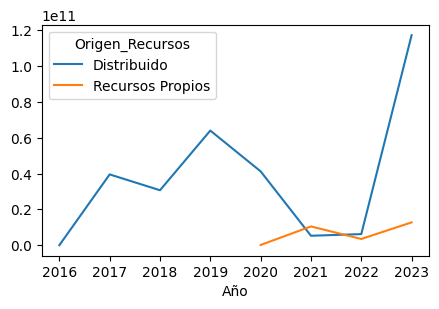

In [30]:
display(df[df['Departamento'] =='Santander'].groupby(['Año', 'Origen_Recursos'])['Valor del Contrato'].sum().unstack())
df[df['Departamento'] =='Santander'].groupby(['Año', 'Origen_Recursos'])['Valor del Contrato'].sum().unstack().plot(kind ='line', figsize =(5,3))
plt.show()

Según la data, en Colombia solo hasta 2020 se incluyeron recursos propios para contratación pública. Particularmente para el Departamento de Santander, se evidencia una asignación fluctuante en la asignación de recursos distribuidos, con tendencia al aumento de los mismos entre 2016 y 2019, excepto para 2018 donde la asignación fue inferior a 2017. Ya para 2019 se observa una disminución progresiva en la asignación de recursos distribuidos hasta 2021, cuando la destinación de recursos propios fue superior a la asignación de recursos distribuidos. Durante 2021 y 2022 la asignación de recursos fue notablemente baja hecho que puede ser atribuido al impacto economico generado por la pandemia. Para lo corrido de 2023, tanto recursos distribuidos como propios han sido superiores que en años anteriores. 

### Disclaimer

Los data empleada para este ejercicio corresponde a los contratos establecidos como 'ACTIVOS' según ColombiaCompraEficiente. Sin embargo, el porcentaje de contratos con fecha de finalización de la ejecución anterior o igual a la fecha en que fue actualizada la data asiende al 90.86%. Además, se registran fechas de finalización de contratos anterior a su firma.

In [31]:
#% de Contratos con fecha de finalización anterior o igual a la fecha de actualización del archivo
round(df['Fecha_Fin_Contrato'].loc[df['Fecha_Fin_Contrato']<= datetime(2023,11,2,0,0,0)].count() / df.shape[0] *100,2)

90.86

In [32]:
#Fecha fin contrato: min
df['Fecha_Fin_Contrato'].min()

Timestamp('2013-03-01 00:00:00')

In [33]:
#Fecha fin contrato : max
df['Fecha_Fin_Contrato'].max()

Timestamp('2072-05-16 00:00:00')